In [1]:
def majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    
    return winner

In [4]:
def weighted_vote():
    pass

In [5]:
def majority_vote_2_0():
    votes = Counter(labels)
    winner, winner_count = votes.most_common(1)[0]
    
    num_winners = len([c for c in votes.values() if c == winner_count])
    if num_winner == 1:
        return winner
    else:
        return majority_vote_2_0(labels[:-1])

In [9]:
from math import sqrt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
# from sorting_algo.quick_sort import quick_sort


class knn:
    def __init__(self, x_train=0, y_train=0, classes=0, k=0):
        self.x_train = x_train
        self.y_train = y_train
        self.classes = classes
        self.point = None
        self.k = k

    def distances(self):
        summ = 0
        distance = []
        for i in range(len(self.x_train)):
            for j in range(len(self.x_train[0])):
                summ += (self.x_train[i][j] - self.point[j]) ** 2
            distance.append(sqrt(summ))
            summ = 0
        return distance

    def fit(self, x_train, y_train, classes, k=5):
        self.x_train = x_train
        self.y_train = y_train
        self.classes = classes
        self.k = k

    def predict(self, point):
        self.point = point
        dist = self.distances()
        pr = {}
        for i in range(len(self.x_train)):
            pr[dist[i]] = self.y_train[i]
        sort_dist = sorted(list(pr.keys()))
        result = []
        for i in sort_dist[:self.k]:
            result.append(pr[i])
        print(result)
        sum = 0
        for i in result:
            sum += i
        return sum/len(result)

def main():
    data = datasets.load_iris()

    X = np.array(data["data"])
    y = np.array(data["target"])
    classes = data["target_names"]

    X_train, X_test, y_train, y_test = train_test_split(X, y)

    model = knn()
    model.fit(X_train, y_train, classes)
    p = model.predict(X_test[3])
    print('predict : ', p)
    print(classes[int(round(p))])
    print(y_test[3])

if __name__ == '__main__':
    main()

[1, 1, 1, 2, 2]
predict :  1.4
versicolor
2


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

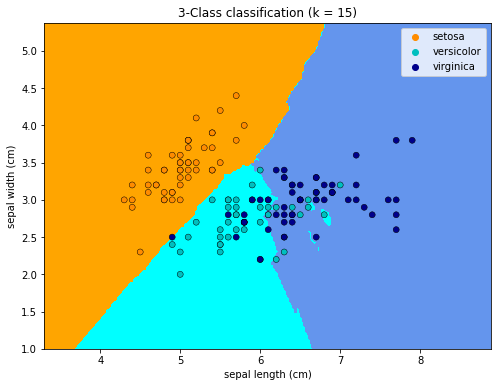

In [8]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)"
          % (n_neighbors))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()